# **Analisis Proposal PKM yang Lolos Tahap 2 Tahun 2023**
©ArthDAnalyst (Philodoxia)

Dataset : </br>
Dataset didapatkan dari file PDF Surat-Pengumuman-Pendanaan-PKM-8-Bidang-2023-Diktiristek yang diberikan pada situs simbelmawa. File PDF kemudian dipotong hanya untuk memuat halaman data proposal menggunakan tools https://www.ilovepdf.com/split_pdf. Selanjutnya, file PDF diubah menjadi file xls menggunakan tools https://www.ilovepdf.com/pdf_to_excel.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# Memuat dataset ke dataframe panda
df = pd.read_excel("/content/drive/MyDrive/Dataset/Dataset-PKM.xlsx")

In [4]:
df.head()

,No,Pembina,Kode_PT,Perguruan Tinggi,kd_skim,judul,Mahasiswa Pengusul,NIM Mahasiswa,Pendanaan
0,1,LLDIKTI I,12008,Institut Kesehatan Medistra Lubuk Pakam,PKMRE,FORMULASI SEDIAAN NANOGEL EKSTRAK MAGGOT (Herm...,KHAIRIL AKBAR,2051053,9200000
1,2,LLDIKTI I,12009,Institut Pendidikan Tapanuli\nSelatan,PKMPM,Edukasi GGP (Green Growth Program) Sebagai Mit...,LADY DAYANA,21050037,6000000
2,3,LLDIKTI I,12005,Institut Teknologi Del,PKMRE,Pemanfaatan Seelulosa Alang-Alang Untuk Pembua...,BINTANG ADE PATRESIA SIMANJUNTAK,31S20017,8500000
3,4,LLDIKTI I,13067,Sekolah Tinggi Ilmu Ekonomi\nEka Prasetya,PKMRSH,Keputusan pembelian berdasarkan bauran pemasaran,AYU AFIANI ZEGA,221010227,9050000
4,5,LLDIKTI I,13085,Sekolah Tinggi Ilmu Manajemen\nSukma,PKMK,Cemilan Daun Kelor Sebagai Detox Tubuh,RAHEL SIMANULLANG,21140042,6000000


**Pembersihan Data**


---



In [ ]:
# Menghilangkan \n dari nama perguruan tinggi
df['Perguruan Tinggi'] = df['Perguruan Tinggi'].replace('\n', ' ', regex=True)
# Menghilangkan \n dari judul
df['judul'] = df['judul'].replace('\n', ' ', regex=True)

In [ ]:
# Menghapus kolom yang kurang relevan (No, Pembina, Kode PT, Mahasiswa Pengusul)
df.drop(columns=['No', 'Pembina', 'Kode_PT', 'Mahasiswa Pengusul'], inplace=True)

In [ ]:
# Mengatur teks pada kolom judul menjadi lowercase
df['judul'] = df['judul'].str.lower()

In [ ]:
# Menghapus simbol dari kolom judul
df['judul'] = df['judul'].replace('[^\w\s]', '', regex=True)

In [ ]:
# Merubah nama kolom agar lebih ringkas
df = df.rename(columns={'Perguruan Tinggi':'PT','kd_skim':'Skema','judul':'Judul','NIM Mahasiswa':'NIM'})

In [ ]:
df.head()

,PT,Skema,Judul,NIM,Pendanaan
0,Institut Kesehatan Medistra Lubuk Pakam,PKMRE,formulasi sediaan nanogel ekstrak maggot herma...,2051053,9200000
1,Institut Pendidikan Tapanuli Selatan,PKMPM,edukasi ggp green growth program sebagai mitig...,21050037,6000000
2,Institut Teknologi Del,PKMRE,pemanfaatan seelulosa alangalang untuk pembuat...,31S20017,8500000
3,Sekolah Tinggi Ilmu Ekonomi Eka Prasetya,PKMRSH,keputusan pembelian berdasarkan bauran pemasaran,221010227,9050000
4,Sekolah Tinggi Ilmu Manajemen Sukma,PKMK,cemilan daun kelor sebagai detox tubuh,21140042,6000000


**Statistik Dasar**


---



In [ ]:
# Statistika Keseluruhan
print("Statistika Global")
print(f"Jumlah proposal yang lolos : {df.shape[0]}")
print(f"Mean pendanaan : Rp.{df['Pendanaan'].mean().round()}")
print(f"Median pendanaan : Rp.{df['Pendanaan'].median()}")
print(f"Max pendanaan : Rp.{df['Pendanaan'].max()}")
print(f"Min pendanaan : Rp.{df['Pendanaan'].min()}")

Statistika Global
Jumlah proposal yang lolos : 5102
Mean pendanaan : Rp.7644061.0
Median pendanaan : Rp.7500000.0
Max pendanaan : Rp.10000000
Min pendanaan : Rp.6000000


In [ ]:
# Statistika Unud
df_unud = df[df['PT'].str.contains('Udayana', case=False)]
print("Statistika Unud")
print(f"Jumlah proposal yang lolos : {df_unud.shape[0]}")
print(f"Mean pendanaan : Rp.{df_unud['Pendanaan'].mean().round()}")
print(f"Median pendanaan : Rp.{df_unud['Pendanaan'].median()}")
print(f"Max pendanaan : Rp.{df_unud['Pendanaan'].max()}")
print(f"Min pendanaan : Rp.{df_unud['Pendanaan'].min()}")
df_unud

Statistika Unud
Jumlah proposal yang lolos : 39
Mean pendanaan : Rp.7237179.0
Median pendanaan : Rp.7350000.0
Max pendanaan : Rp.9500000
Min pendanaan : Rp.6000000


,PT,Skema,Judul,NIM,Pendanaan
5063,Universitas Udayana,PKMK,inovasi paper gel transdermal patch aromatherapy ekstrak capsaicin capsicum frustecens linn sebagai pereda nyeri otot dan pegal yang praktis,2108551097,7750000
5064,Universitas Udayana,PKMK,pemanfaatan tepung biji mangga mangifera indica l untuk biskuit biji mangga bisbima sebagai alternatif asupan karbohidrat,2108551041,6300000
5065,Universitas Udayana,PKMK,sunscreen gel 3in1 kombinasi jagung dan binahong sebagai anti aging antibakteri penyebab acne vulgaris uv protection,2108551068,6000000
5066,Universitas Udayana,PKMK,wake mask clay mask kombinasi buah wani mangifera caesia dan bunga kenanga sebagai pencegahan jerawat serta menjaga kesehatan kulit wajah,2108551078,6000000
5067,Universitas Udayana,PKMKC,deteksi penyakit tanaman tomat berbasis network scaling dan deep ensemble learning,2105551010,7500000
5068,Universitas Udayana,PKMKC,inovasi kursi roda elektrik berbasis voice recognition module v3 dan machine learning sebagai alat bantu penderita disabilitas quadriplegia,2108561022,8850000
5069,Universitas Udayana,PKMKC,monitoring system skala kekuatan otot pada pasien stroke berbasis surface electromyography terintegrasi internet of things,2205531030,8500000
5070,Universitas Udayana,PKMKC,prostesis lengan cerdas berbasis kinodynamic dan neural network sebagai rekontruksi lengan pada pasien pasca amputasi,2105531105,8300000
5071,Universitas Udayana,PKMPI,penerapan alat pengering cat otomatis terintegrasi iot untuk meningkatkan produktivitas usaha bokor ukir fiber khas bali pada musim hujan,2105541011,8050000
5072,Universitas Udayana,PKMPM,akrodha pelatihan yoga dan meditasi untuk mencegah gangguan emosional serta mengelola emosi pada remaja di banjar tegeh dalung,2002521036,6750000


**Wordcloud (Frekuensi Kata Pada Judul)**


---



In [ ]:
# Daftar stop-word bahasa Indonesia
f = open("/content/drive/MyDrive/Dataset/tala-stopwords-indonesia.txt", "r")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

print(stopword_list)

In [ ]:
# Tokenisasi Judul
text_token = df['Judul'].apply(nltk.word_tokenize).tolist()

In [ ]:
# Menghilangkan stop-word
text_clean = [x for word in text_token for x in word if not x in stopword_list]

In [ ]:
# Menggabungkan seluruh teks pada kolom judul
text_clean_combined = ' '.join(text_clean)

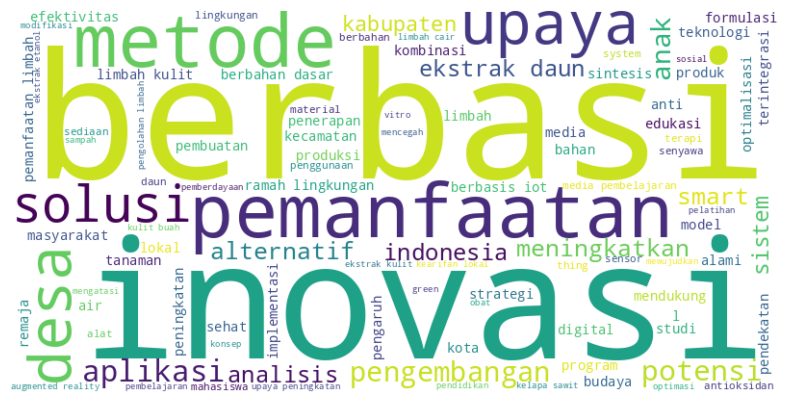

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_clean_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Analisis Judul**


---



Kata : Game

In [ ]:
# Judul dengan kata game
pd.set_option('max_colwidth', None)
df_game = df[df['Judul'].str.contains('game')][['Skema', 'Judul', 'Pendanaan', 'PT']]
print("Jumlah judul yang berisikan kata game : ", df_game.shape[0])
print("Detail : ")
count_skema = df_game['Skema'].value_counts()
print(count_skema)
print("Daftar Judul : ")
df_game

Jumlah judul yang berisikan kata game :  59
Detail : 
PKMPM     22
PKMRSH    18
PKMK      12
PKMKC      5
PKMVGK     1
PKMKI      1
Name: Skema, dtype: int64
Daftar Judul : 


,Skema,Judul,Pendanaan,PT
9,PKMPM,pengembangan literasi digital dan etika pada anakanak dengan game edukasi di pondok belajar arnila kampung nelayan seberang,7750000,STMIK Triguna Dharma
41,PKMK,inovasi smart popup games book ethomathmatics berbasis fitur braille untuk tunanetra kota medan,8000000,Universitas Muhammadiyah Sumatera Utara
386,PKMRSH,implementasi media pembelajaran berbasis games snaktivity guna meningkatkan intelektualitas motivasi dan keaktifan peserta didik dalam proses pembelajaran,7000000,Universitas Buana Perjuangan Karawang
545,PKMK,jaga lingkungan inovasi board game berbasis augmented reality sebagai media edukasi guna meningkatkan kesadaran anak usia sekolah terhadap lingkungan,7250000,Institut Sains Dan Teknologi Akprind
598,PKMK,spidugame media belajar dan bermain untuk peningkatan dasar keimanan dan akhlak bagi anakanak muslim,6000000,Universitas Ahmad Dahlan
606,PKMPM,avoid game strategic stave off kidnapping sebagai edukasi pencegahan penculikan anak di tk aba danunegaran yogyakarta,6500000,Universitas Ahmad Dahlan
689,PKMPM,deaflearn aplikasi games berbasis mobile untuk pembelajaran literasi anakanak tunarungu di komunitas dunia tak lagi sunyi,7000000,Universitas Kristen Duta Wacana
741,PKMPM,meningkatkan literasi dikalangan siswa sekolah dasar berbasis teams games tournament tgt,6500000,Universitas Proklamasi 45
803,PKMPM,appes apply tradisional games untuk mencegah kecanduan gadget pada anak sekolah dasar negeri 2 pegulon kabupaten kendal,7400000,Sekolah Tinggi Ilmu Kesehatan Kendal
863,PKMRSH,trace map game untuk meningkatkan sex education awareness remaja wilayah pesisir di tengah tingginya kekerasan seksual,7500000,Universitas Islam Sultan Agung


Kata : Augmented Reality

In [ ]:
# Judul dengan kata augmented reality
pd.set_option('display.max_rows', None)
df_ar = df[df['Judul'].str.contains('augmented reality')][['Skema', 'Judul', 'Pendanaan']]
print("Jumlah judul yang berisikan kata aplikasi : ", df_ar.shape[0])
print("Detail : ")
count_skema = df_ar['Skema'].value_counts()
print(count_skema)
print("Daftar Judul : ")
df_ar

Jumlah judul yang berisikan kata aplikasi :  55
Detail : 
PKMK      16
PKMPM     15
PKMRSH    15
PKMKC      5
PKMPI      3
PKMKI      1
Name: Skema, dtype: int64
Daftar Judul : 


,Skema,Judul,Pendanaan
89,PKMPM,penguatan literasi keagamaan dan pengajaran alquran menggunakan augmented reality animation quranic study kepada anakanak pusat kampung qurani deli serdang,8250000
276,PKMK,penerapan augmented reality pada fashion sebagai pengenalan bentuk molekul kimia untuk edukasi di kalangan remaja,6500000
337,PKMRSH,implementasi augmented reality ar laboratory pada praktikum fisika dalam melatih keterampilan abad 21 pada pokok bahasan listrik dinamis,7850000
456,PKMPI,penerapana sistem try on produk batik kuningan menggunakan metode virtual berbasis augmented reality,7750000
520,PKMKC,augmented reality untuk terapi wicara anak yang mengalami keterlambatan berbicara,6000000
545,PKMK,jaga lingkungan inovasi board game berbasis augmented reality sebagai media edukasi guna meningkatkan kesadaran anak usia sekolah terhadap lingkungan,7250000
709,PKMKC,inovasi media pembelajaran kosa kata bahasa inggris berbasis android menggunakan algoritma hidden markov model speech recognition dan augmented reality,8500000
758,PKMPM,edukasi easy cooking berbasis augmented reality untuk mengasah kreatifitas berwirausaha pada anak panti asuhan al hakim sinar melati ii yogyakarta,7750000
947,PKMPM,edukasi mitigasi bencana gempabumi melalui augmented reality uno card bagi anak penyandang disabilitas,7500000
968,PKMK,countryich nesia oleholeh khas untuk wisatawan mancanegara sebagai media promosi keragaman pariwisata berbasis budaya dilengkapi teknologi augmented reality,8000000


Kata : Deep Learning

In [ ]:
# Judul dengan kata deep learning
pd.set_option('display.max_rows', None)
df_dl = df[df['Judul'].str.contains('deep learning')][['Skema', 'Judul', 'Pendanaan']]
print("Jumlah judul yang berisikan kata deep learning : ", df_dl.shape[0])
print("Detail : ")
count_skema = df_dl['Skema'].value_counts()
print(count_skema)
print("Daftar Judul : ")
df_dl

Jumlah judul yang berisikan kata deep learning :  19
Detail : 
PKMKC    17
PKMKI     1
PKMRE     1
Name: Skema, dtype: int64
Daftar Judul : 


,Skema,Judul,Pendanaan
318,PKMKC,maproad sistem pendeteksi dan pemetaan kerusakan jalan berbasis edge computing dan deep learning,8250000
524,PKMKC,inovasi monitor pintar menggunakan voice recognition berbasis deep learning natural language processing sebagai sarana penunjang karya wisata museum,9350000
527,PKMKC,pendeteksi dini kejahatan jalan menggunakan cctv pintar berbasis deep learning dan computer vision,6750000
2106,PKMKI,gratic grader automatic perangkat sortir dan hitung otomatis ikan budidaya berdasarkan panjang ikan berbasis deep learning,8200000
2326,PKMRE,pengembangan model estimasi human footprint dengan pendekatakan geospasial sebagai upaya mengintegrasikan tindakan antisipasi perubahan iklim berbasis deep learning,8200000
2375,PKMKC,autonomous underwater vehicle untuk deteksi dan penyelamatan korban kapal tenggelam berbasis sensor sonar dan deep learning,8250000
2380,PKMKC,danadyaksa remotely operated vehicle pendeteksi otomatis korban tenggelam dan evakuasi black box menggunakan metode object detection berbasis deep learning,6500000
2395,PKMKC,rancang bangun prototipe penerjemah bahasa isyarat dua arah bisindobahasa indonesia berbasis deep learning dan pemodelan 3d,7750000
2396,PKMKC,rancang bangun sistem deteksi dan penanganan dini risiko sudden cardiac death berbasis deep learning dan terintegrasi dengan aplikasi smartphone,8250000
2402,PKMKC,smart detection permittivity biosensor pendeteksi risiko chronic obstructive pulmonary disease berbasis deep learning,9000000


Kata : Machine Learning

In [ ]:
# Judul dengan kata machine learning
pd.set_option('display.max_rows', None)
df_ml = df[df['Judul'].str.contains('machine learning')][['Skema', 'Judul', 'Pendanaan']]
print("Jumlah judul yang berisikan kata machine learning : ", df_ml.shape[0])
print("Detail : ")
count_skema = df_ml['Skema'].value_counts()
print(count_skema)
print("Daftar Judul : ")
df_ml

Jumlah judul yang berisikan kata machine learning :  30
Detail : 
PKMKC    21
PKMRE     5
PKMPI     2
PKMKI     2
Name: Skema, dtype: int64
Daftar Judul : 


,Skema,Judul,Pendanaan
310,PKMPI,penerapan smart greenhouse untuk optimalisasi hasil pertanian hidroponik dengan implementasi iot dan machine learning di syifa hidroponik,8750000
1128,PKMKC,alat deteksi kantuk untuk pengemudi berbasis machine learning,8000000
2292,PKMKC,alat pemadam kebakaran nirkabel berbasis roda rantai dengan konektor selang hidran serta smart system berbasis computer vision dan machine learning,9000000
2304,PKMKC,sistem identifikasi tingkat stres tanaman perkebunan berbasis analisis spektrum rgb foto udara dan machine learning,6000000
2329,PKMRE,prediksi kebakaran lahan kelapa sawit di indonesia dalam menentukan prioritas pendaftaran premi murni berbasis machine learning untuk meminimalisasi kerugian ekonomi,6500000
2378,PKMKC,carvertid aplikasi konversi internal combustion engine ke battery electric vehicle berbasis machine learning untuk percepatan transformasi mobil listrik di indonesia,6050000
2381,PKMKC,deteksi penyakit dan hama tanaman padi dengan machine learning menggunakan drone,7650000
2398,PKMKC,rapid diagnostic microfluidic biosensor untuk deteksi dini gangguan neurologis berbasis machine learning,9700000
2576,PKMKC,alat pendeteksi dini retinopati diabetik menggunakan machine learning terintegrasi internet of things,7450000
2577,PKMKC,dkortisol sistem deteksi stres melalui saliva dengan metode differential pulse voltammetry berbasis machine learning terintegrasi iot,9500000


Kata : Aplikasi

In [ ]:
# Judul dengan kata aplikasi
pd.set_option('display.max_rows', None)
df_aplikasi = df[df['Judul'].str.contains('aplikasi')][['Skema', 'Judul', 'Pendanaan']]
print("Jumlah judul yang berisikan kata aplikasi : ", df_aplikasi.shape[0])
print("Detail : ")
count_skema = df_aplikasi['Skema'].value_counts()
print(count_skema)
print("Daftar Judul : ")
df_aplikasi

Jumlah judul yang berisikan kata aplikasi :  225
Detail : 
PKMKC     68
PKMRE     58
PKMPM     27
PKMK      23
PKMRSH    21
PKMVGK    10
PKMKI      9
PKMPI      9
Name: Skema, dtype: int64
Daftar Judul : 


,Skema,Judul,Pendanaan
6,PKMRE,pengaruh aplikasi menu makanan gizi seimbang balita untuk mencegah stunting menggunakan metode dempster shafer dan naive bayes,6250000
26,PKMKI,aplikasi rujatrans informasi rute perjalanan angkutan umum,6500000
31,PKMKC,aplikasi penyedia pekerjaan lepas trivial berbasis web dan mobile sebagai upaya penguatan ekonomi masyarakat,7250000
36,PKMK,ara angkot ruteapps aplikasi berbasis teknologi digital untuk meningkatkan minat masyarakat memilih angkot sebagai moda transportasi di kota medan,6500000
66,PKMPI,petaniku aplikasi petani sebagai solusi bebas ijon untuk meningkatkan living standard petani sayur di kecamatan medan marelan,7150000
73,PKMPM,character building by experiential learning program pembangunan karakter diri dengan mengaplikasikan experiential learning di yayasan pembinaan anak cacat medan,6000000
82,PKMPM,pembinaan volunteer ppdi berbasis aplikasi digital sebagai media komunikasi dalam meningkatkan interaksi tunarungu di dpd ppdi sumatera utara,6500000
86,PKMPM,pengaduan masyarakat desa dengan aplikasi simdes sebagai upaya memudahkan sistem pengaduan pelayanan bpd desa beringin deli serdang,8000000
88,PKMPM,pengembangan model komunikasi berbasis aplikasi digital sebagai media komunikasi tunanetra dan tunarungu di dpd ppdi sumatera utara,6000000
147,PKMPM,birokrasi digital dengan mengimplementasikan aplikasi berbasis singgel identity di rukun tetangga yosomulyo metro lampung,7650000
